# Machine Learning


Objetivo didático: estudar os classificadores da biblioteca scikit-learn, estudar compreensão e análise de dados

Criar um classificador que diga se um aluno vai tirar mais de 5 na prova do ENADE de acordo com suas características
 


In [ ]:
# bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics



In [ ]:
# acesso ao arquiv no google drive
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# lê o arquivo e cria um dataframe Pandas
raw_data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/MICRODADOS_ENADE_2014.txt', delimiter=';', low_memory=False)
df2014 = pd.DataFrame(raw_data)
df2014.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_2G,ANO_IN_GRAD,TP_SEMESTRE,IN_MATUT,IN_VESPER,IN_NOTURNO,ID_STATUS,AMOSTRA,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,...,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,QE_I69,QE_I70,QE_I71,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2014,1,10002,10028,5710,3,1,5103403,51,5,24,M,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BCEBBCED,1110111.0,ECEBEBADBAAEDAAADACCABAEDDE,191911911119190009100090999,555,555,555,...,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,6.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,10002,10028,5710,3,1,5103403,51,5,22,F,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,ADEBDAED,10111011.0,ECEEEBABBAADBADDDDCEEAEEDEA,191911901119091109100090999,555,555,555,...,5.0,2.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,10002,10028,5710,3,1,5103403,51,5,24,F,2007,2008,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,ACEBDCED,11111111.0,ECEDEBADBAADBDADBCBCBDAEEDB,191911911119090119001090999,555,555,555,...,6.0,4.0,4.0,1.0,2.0,1.0,1.0,2.0,6.0,6.0,4.0,4.0,2.0,1.0,1.0,6.0,4.0,1.0,4.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,10002,10028,5710,3,1,5103403,51,5,24,M,2007,2008,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BEDBBAED,10011.0,ECEBCEACBAABDDBDDECCBCEDCBA,191900901119190109101190999,555,555,555,...,3.0,2.0,1.0,1.0,1.0,1.0,7.0,7.0,1.0,5.0,3.0,6.0,1.0,4.0,4.0,4.0,4.0,2.0,6.0,1.0,7.0,7.0,5.0,4.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,10002,10028,5710,3,1,5103403,51,5,23,M,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BCEBEAED,1110011.0,CCEAEBAEBABBDABCDCCBEBDEACC,091911901109190009110090999,555,555,555,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,6.0,6.0,6.0,6.0,1.0,5.0,4.0,5.0,3.0,2.0,5.0,5.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cria a coluna 'Aprovacao' com 1 para aprovado e 0 para reprovado dependendo da nota
df2014['APROVACAO'] = np.where(df2014['NT_GER']>=50, 'A', 'R')
df2014.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_2G,ANO_IN_GRAD,TP_SEMESTRE,IN_MATUT,IN_VESPER,IN_NOTURNO,ID_STATUS,AMOSTRA,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,...,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,QE_I69,QE_I70,QE_I71,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81,APROVACAO
0,2014,1,10002,10028,5710,3,1,5103403,51,5,24,M,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BCEBBCED,1110111.0,ECEBEBADBAAEDAAADACCABAEDDE,191911911119190009100090999,555,555,555,...,5.0,5.0,5.0,4.0,4.0,4.0,5.0,6.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
1,2014,1,10002,10028,5710,3,1,5103403,51,5,22,F,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,ADEBDAED,10111011.0,ECEEEBABBAADBADDDDCEEAEEDEA,191911901119091109100090999,555,555,555,...,2.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,2014,1,10002,10028,5710,3,1,5103403,51,5,24,F,2007,2008,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,ACEBDCED,11111111.0,ECEDEBADBAADBDADBCBCBDAEEDB,191911911119090119001090999,555,555,555,...,4.0,4.0,1.0,2.0,1.0,1.0,2.0,6.0,6.0,4.0,4.0,2.0,1.0,1.0,6.0,4.0,1.0,4.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,2014,1,10002,10028,5710,3,1,5103403,51,5,24,M,2007,2008,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BEDBBAED,10011.0,ECEBCEACBAABDDBDDECCBCEDCBA,191900901119190109101190999,555,555,555,...,2.0,1.0,1.0,1.0,1.0,7.0,7.0,1.0,5.0,3.0,6.0,1.0,4.0,4.0,4.0,4.0,2.0,6.0,1.0,7.0,7.0,5.0,4.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
4,2014,1,10002,10028,5710,3,1,5103403,51,5,23,M,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BCEBEAED,1110011.0,CCEAEBAEBABBDABCDCCBEBDEACC,091911901109190009110090999,555,555,555,...,2.0,2.0,4.0,2.0,1.0,1.0,2.0,6.0,6.0,6.0,6.0,1.0,5.0,4.0,5.0,3.0,2.0,5.0,5.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R


In [ ]:
df2014.groupby('NT_GER').size()

NT_GER
0.0     1472
0.3        1
0.4        1
0.5        1
0.6        2
        ... 
94.3       1
94.7       1
95.3       1
96.1       1
97.4       1
Length: 922, dtype: int64

pq tantos zeros? investiguem...

In [ ]:
# Cria a coluna 'Aprovacao' com 1 para aprovado e 0 para reprovado dependendo da nota
df2014['APROVACAO'] = np.where(df2014['NT_GER']>=50, 'A', 'R')
df2014.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_2G,ANO_IN_GRAD,TP_SEMESTRE,IN_MATUT,IN_VESPER,IN_NOTURNO,ID_STATUS,AMOSTRA,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,...,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,QE_I69,QE_I70,QE_I71,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81,APROVACAO,SEXO_NUM,Municipio,Curso,INST_ENSINO
0,2014,1,10002,10028,5710,3,1,5103403,51,5,24,M,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BCEBBCED,1110111.0,ECEBEBADBAAEDAAADACCABAEDDE,191911911119190009100090999,555,555,555,...,4.0,4.0,5.0,6.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,0,False,False,False
1,2014,1,10002,10028,5710,3,1,5103403,51,5,22,F,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,ADEBDAED,10111011.0,ECEEEBABBAADBADDDDCEEAEEDEA,191911901119091109100090999,555,555,555,...,3.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1,False,False,False
2,2014,1,10002,10028,5710,3,1,5103403,51,5,24,F,2007,2008,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,ACEBDCED,11111111.0,ECEDEBADBAADBDADBCBCBDAEEDB,191911911119090119001090999,555,555,555,...,1.0,1.0,2.0,6.0,6.0,4.0,4.0,2.0,1.0,1.0,6.0,4.0,1.0,4.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1,False,False,False
3,2014,1,10002,10028,5710,3,1,5103403,51,5,24,M,2007,2008,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BEDBBAED,10011.0,ECEBCEACBAABDDBDDECCBCEDCBA,191900901119190109101190999,555,555,555,...,1.0,7.0,7.0,1.0,5.0,3.0,6.0,1.0,4.0,4.0,4.0,4.0,2.0,6.0,1.0,7.0,7.0,5.0,4.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,0,False,False,False
4,2014,1,10002,10028,5710,3,1,5103403,51,5,23,M,2008,2010,2,1,1,1,1,1,0,8,0,0,0,27,0,10,0,ACEBDCED,ACEBDCED,EDEAEBCDBAABDADDBDCBBCACEEE,EXEXEBXDBAAXDXDDBXCBBCXCXXX,BCEBEAED,1110011.0,CCEAEBAEBABBDABCDCCBEBDEACC,091911901109190009110090999,555,555,555,...,1.0,1.0,2.0,6.0,6.0,6.0,6.0,1.0,5.0,4.0,5.0,3.0,2.0,5.0,5.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,0,False,False,False


In [ ]:
df2014.groupby('APROVACAO').size()

APROVACAO
A    140040
R    341680
dtype: int64

# Aqui podem começar as decisões de vocês


quais atributos devem ser usados? 

quais devem ser descartados? 

por exemplo, seria interessante criar faixas etárias ao invés de trabalhar com a idade direto? 

dica: transformar os atributos que são string em números para árvores.

In [ ]:
df2014['SEXO_NUM'] = np.where(df2014['TP_SEXO']=='F', 1, 0)
df2014['Municipio']= (type(df2014['CO_MUNIC_CURSO'])==int)
df2014['Curso']= (type(df2014['CO_CURSO'])==int)
df2014['INST_ENSINO']= (type(df2014['CO_IES'])==int)

In [ ]:
dataset = df2014[['CO_GRUPO','ANO_FIM_2G','CO_UF_CURSO', 'CO_REGIAO_CURSO','NU_IDADE','SEXO_NUM','Curso','INST_ENSINO','ANO_IN_GRAD','CO_CATEGAD','TP_SEMESTRE','IN_MATUT','IN_VESPER','IN_NOTURNO','ID_STATUS']]
target = df2014['APROVACAO']

# Mais uma decisão: qual o tamanho do treino e do teste?



In [ ]:
atributos_treino, atributos_teste, alvo_treino, alvo_teste = train_test_split(dataset, target, test_size=0.20)

In [ ]:
atributos_treino.shape

(385376, 15)

# Quais os melhores parâmetros para a árvore?

In [ ]:
arvore = tree.DecisionTreeClassifier(criterion = "entropy", random_state=1, max_depth=10)

In [ ]:
arvore.fit(atributos_treino, alvo_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

notem que no resultado acima existem parâmetros que vocês podem mudar. Por exemplo: min_samples_leaf=1 significa que uma "folha" da sua árvores de decisão pode ter apenas uma linha. Este é o valor padrão. Será que mudando isto melhora a árvore? Estudem os parâmetros e mexam neles para melhorar a acurácia. 

In [ ]:
arvore_pred = arvore.predict(atributos_teste)
print ("Acurácia é ", metrics.accuracy_score(alvo_teste,arvore_pred)*100)

Acurácia é  72.3584239807357


A proxima célula faz uma demonstração gráfica da árvore gerada. Usem para analisar se faz sentido o que estão montando.

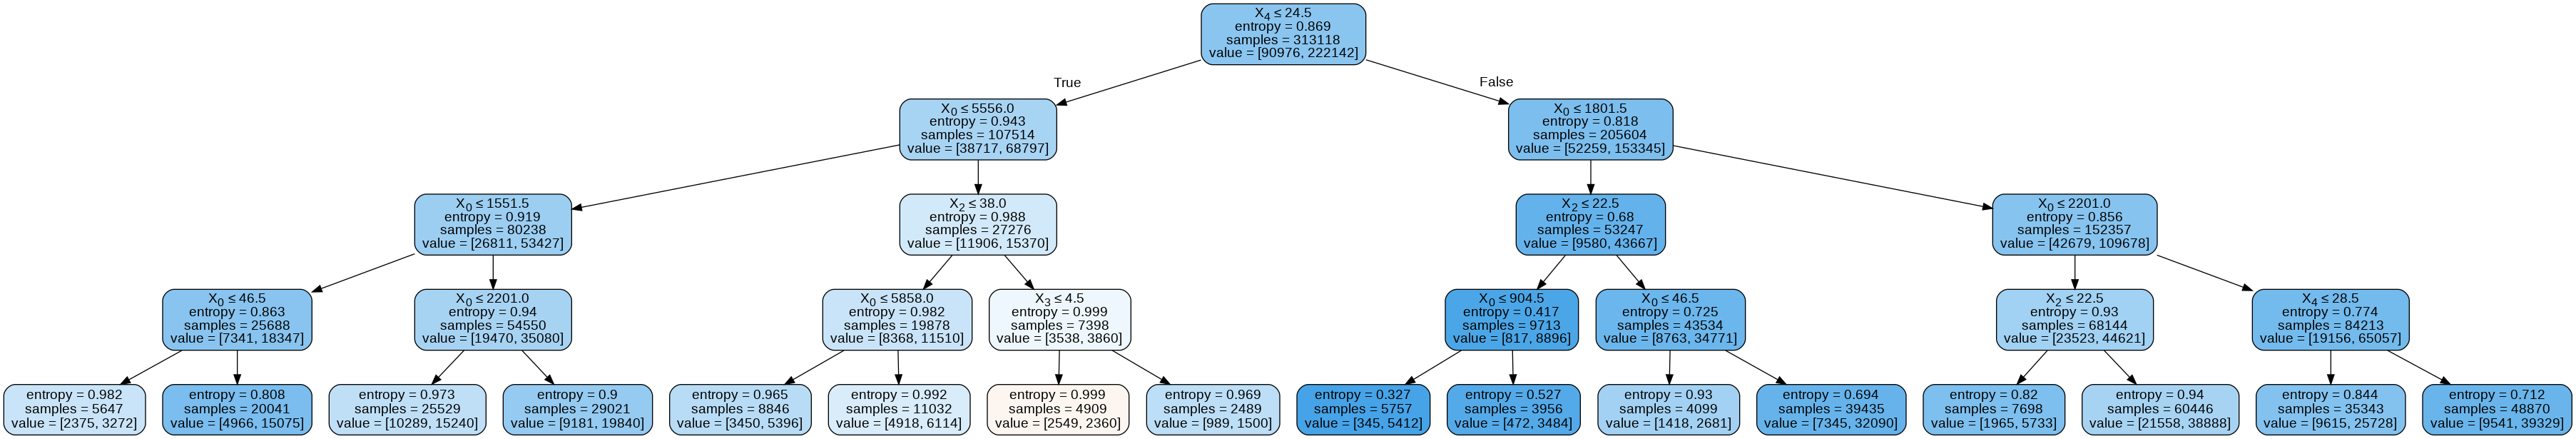

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(arvore, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Quais os melhores parâmetros para o KNN?

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(atributos_treino, alvo_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(atributos_teste)
print ("Acurácia é ", metrics.accuracy_score(alvo_teste,knn_pred)*100)

Acurácia é  66.70917308216985


## Quais os melhores parâmetros para a rede neural?

In [ ]:
neural = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
neural.fit(atributos_treino, alvo_treino)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
neural_pred = neural.predict(atributos_teste)
print ("Acurácia é ", metrics.accuracy_score(alvo_teste,neural_pred)*100)

Acurácia é  70.89743893903987


# Quais os melhores parâmetros para a floresta?

In [ ]:
forest= RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0, max_features=3)

In [ ]:
forest.fit(atributos_treino, alvo_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
forest_pred = forest.predict(atributos_teste)
print ("Acurácia é ", metrics.accuracy_score(alvo_teste,forest_pred)*100)

Acurácia é  71.08426946299569
